資料基本資訊：
1. 總共有幾筆:7043
2. 有幾個特徵:
3. 有幾個缺失值:0

處理步驟：
1. 缺失值統計
2. 資料探勘
    *目前使用串流影音的總數比較
    *在客戶分群上的差異-類別/數字
    *比較有相關的類別/數字一起比較
    *heatmap
    *feature importance
3. 模型

Reference: https://www.kaggle.com/jsaguiar/exploratory-analysis-with-seaborn/comments

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
#import data 
#資料缺失值確認->並無缺失值
cs_b = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
cs_b.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [4]:
cs_b.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#目前使用串流影音產品的比較
#step1 combine streaming tv+streaming movie
# cs_b['Streaming'] = cs_b.StreamingTV.map(dict(Yes=1, No=0))+cs_b.StreamingMovies.map(dict(Yes=1, No=0))
#也可以使用以下方式進行0或1
cs_b['Streaming'] = cs_b['StreamingTV'].replace("No", 0).replace("Yes", 1).replace('No internet service', 0)+cs_b['StreamingMovies'].replace("No", 0).replace("Yes", 1).replace('No internet service', 0)
cs_b= cs_b.fillna(0.0)
# if (cs_b['Streaming'] == 2.0):
#     cs_b['Streaming']=1
#終於成功替換了，因為loc是要標示row, col, 所以如果我只標示row, 整個row就會一起跟著變
cs_b.loc[cs_b['Streaming'] ==2, 'Streaming']=1
cs_b.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [6]:
cs_b.describe()

,SeniorCitizen,tenure,MonthlyCharges,Streaming
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.496805
std,0.368612,24.559481,30.090047,0.500025
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [7]:
cs_b.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,1


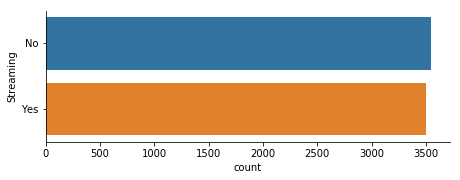

In [8]:
ax = sns.catplot(y="Streaming", kind="count", data=cs_b, height=2.6, aspect=2.5, orient='h')
#修改y-axis的值, 從1, 0到yes ,no
ax.set_yticklabels(['No','Yes'])
plt.tight_layout()

plt.savefig('ratio.png')

In [9]:
#用下面這個無法轉換，可是用第二個可以...why?
# cs_b['TotalCharges'] = cs_b['TotalCharges'].astype(float)
cs_b["TotalCharges"] = pd.to_numeric(cs_b.TotalCharges, errors='coerce')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


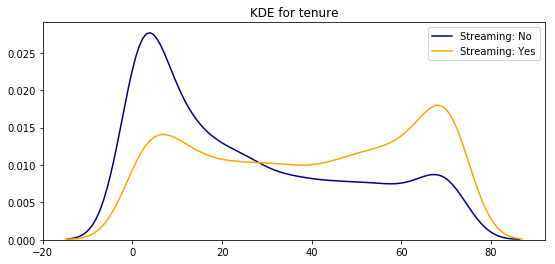

In [10]:
#數字資料 vs 串流分析
#這個圖的橫坐標也需要確認
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(cs_b[cs_b['Streaming'] == 0][feature].dropna(), color= 'navy', label= 'Streaming: No')
    ax1 = sns.kdeplot(cs_b[cs_b['Streaming'] == 1][feature].dropna(), color= 'orange', label= 'Streaming: Yes')

kdeplot('tenure')
plt.savefig('KDE_tenure.png')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


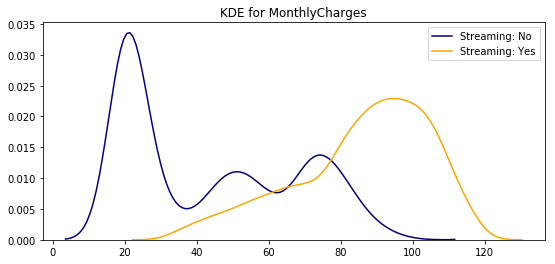

In [11]:
kdeplot('MonthlyCharges')
plt.savefig('KDE_Monthlycharges.png')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


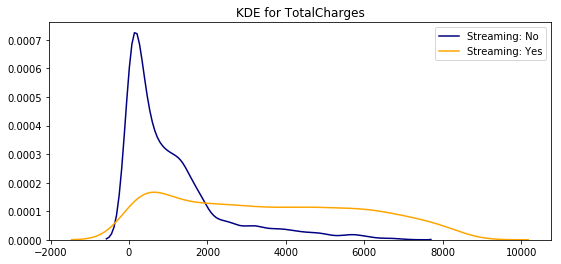

In [12]:
kdeplot('TotalCharges')
plt.savefig('KDE_totalcharges.png')

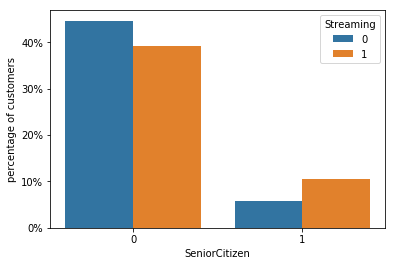

In [13]:
#使用類別資料進行判斷
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = cs_b.groupby(feature)["Streaming"].value_counts().to_frame()
    g = g.rename({"Streaming": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(cs_b)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Streaming', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Streaming', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
#     ax.set_xticklabels(['Not Senior Citizen','Senior Citizen'])
    
barplot_percentages("SeniorCitizen")

# plt.savefig('Seniro.png')

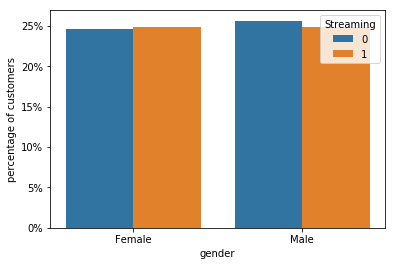

In [14]:
barplot_percentages('gender')
plt.savefig('gender.png')

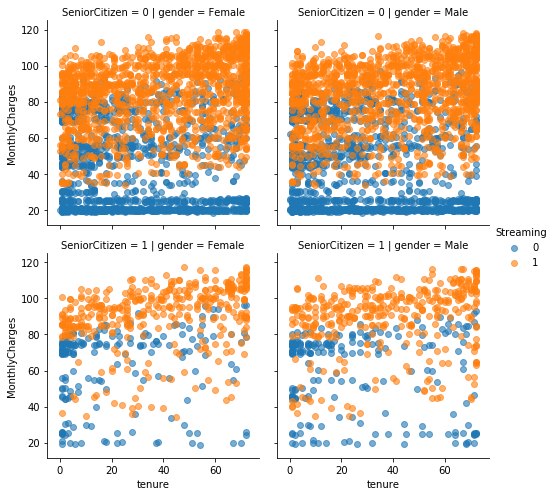

In [15]:
g = sns.FacetGrid(cs_b, row='SeniorCitizen', col="gender", hue="Streaming", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

# leg = g.axes.flat[0].get_legend()
# new_title = 'Streaming'
# leg.set_title(new_title)
# new_labels = ['No', 'Yes']
# for t, l in zip(leg.texts, new_labels): t.set_text(l)


# plt.savefig('Seniro.png')

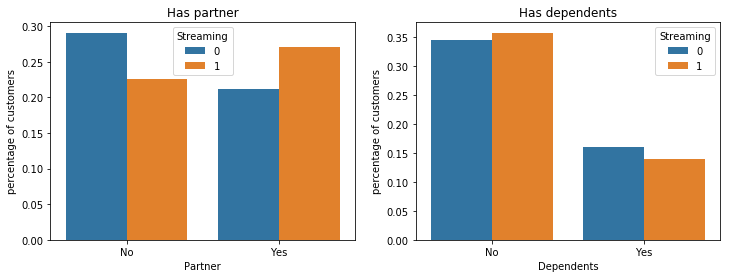

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = cs_b.groupby('Partner')["Streaming"].value_counts()/len(cs_b)
gp_partner = gp_partner.to_frame().rename({"Streaming": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Streaming', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = cs_b.groupby('Dependents')["Streaming"].value_counts()/len(cs_b)
gp_dep = gp_dep.to_frame().rename({"Streaming": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Streaming', data=gp_dep, ax=axis[1])

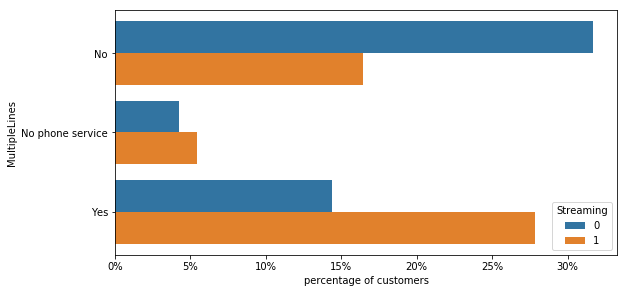

In [17]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


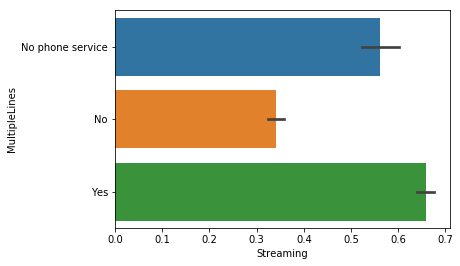

In [18]:
sns.barplot(y = 'MultipleLines', x = 'Streaming', data = cs_b)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


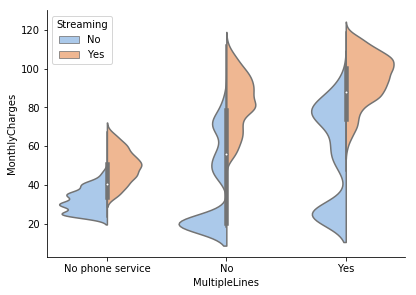

In [19]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Streaming", kind="violin",
                 split=True, palette="pastel", data=cs_b, height=4.2, aspect=1.4, legend_out = False)
leg = ax.axes.flat[0].get_legend()
new_title = 'Streaming'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

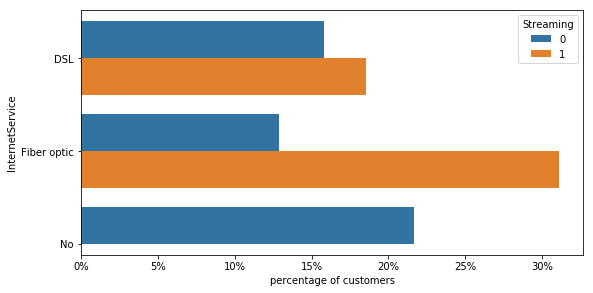

In [20]:
plt.figure(figsize=(9, 4.5))
ax = barplot_percentages("InternetService", orient="h")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


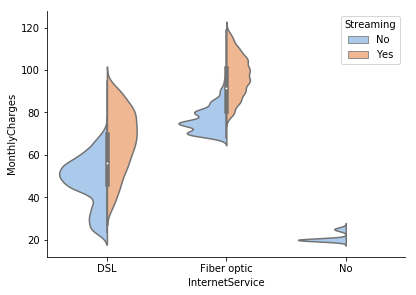

In [21]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Streaming", kind="violin",
                 split=True, palette="pastel", data=cs_b, height=4.2, aspect=1.4, legend_out = False);

leg = ax.axes.flat[0].get_legend()
new_title = 'Streaming'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    

In [22]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
# df1 = cs_b.melt(cs_b[cs_b["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
# plt.figure(figsize=(10, 4.5))
# ax = sns.countplot(data=df1, x='variable', hue='Has service')
# ax.set(xlabel='Additional service', ylabel='Num of customers')
# plt.show()

In [23]:
df1 = cs_b[(cs_b.InternetService != "No") & (cs_b.Streaming == 1)]
df1 = pd.melt(cs_b[cols]).rename({'value': 'Has service'}, axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28172 entries, 0 to 28171
Data columns (total 2 columns):
variable       28172 non-null object
Has service    28172 non-null object
dtypes: object(2)
memory usage: 440.3+ KB


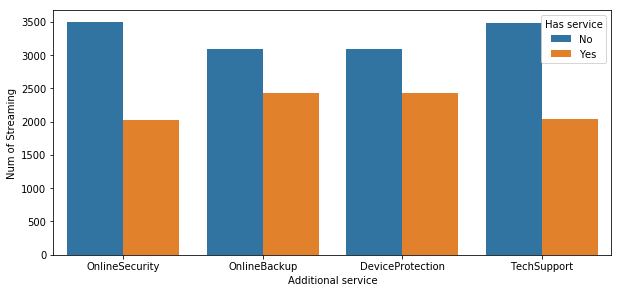

In [24]:
plt.figure(figsize=(10, 4.5))
df1 = cs_b[(cs_b.InternetService != "No") & (cs_b.Streaming == 1)]
df1 = pd.melt(cs_b[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of Streaming')
plt.savefig('service_comparison.png')
plt.show()



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


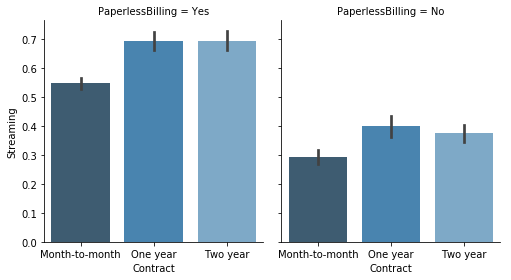

In [25]:
g = sns.FacetGrid(cs_b, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Streaming", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])
plt.savefig('contract_2.png')

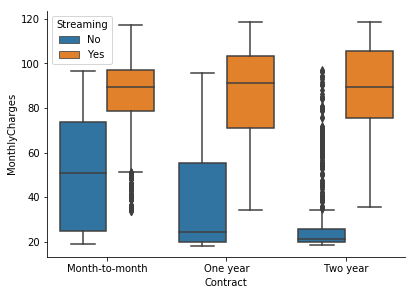

In [26]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Streaming", kind="box", data=cs_b, height=4.2, aspect=1.4, legend_out = False)

leg = ax.axes.flat[0].get_legend()
new_title = 'Streaming'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.savefig('contract.png')

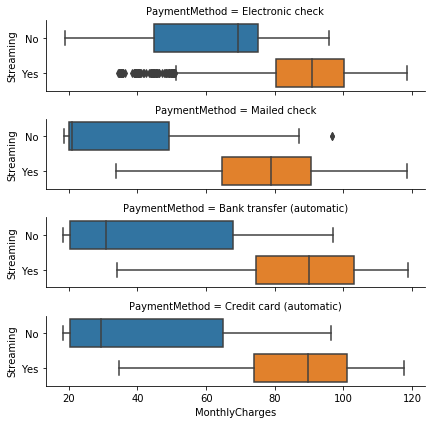

In [63]:
ax = sns.catplot(y="Streaming", x="MonthlyCharges", row="PaymentMethod", kind="box", data=cs_b, height=1.5, aspect=4, orient='h')
ax.set_yticklabels(['No','Yes'])
plt.savefig('streaming.png')

In [ ]:
cs_b.head()

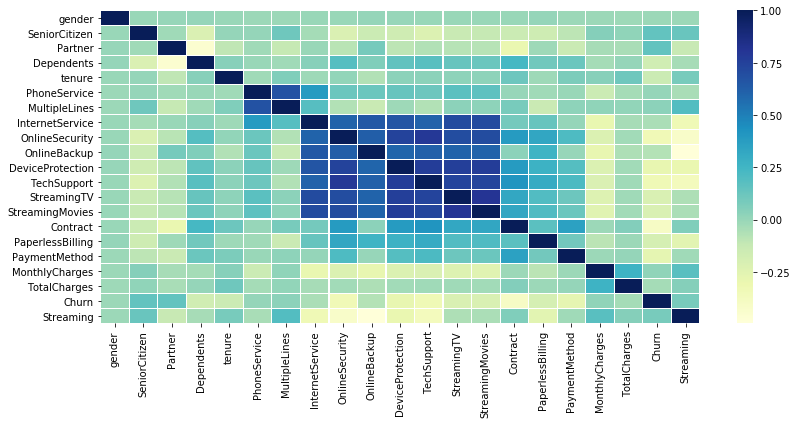

In [140]:
#未修改
plt.figure(figsize=(12, 6))
# cs_b.drop(['customerID'],
#         axis=1, inplace=True)
corr = cs_b_2.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
plt.tight_layout()
plt.savefig('heatmap_2.png')

In [38]:
pd.set_option('display.max_columns', None)
cs_b_2 = cs_b.copy()
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(cs_b_2)
cs_b_2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [36]:
#其實原先data內是有na value,但是沒有發現...
import numpy as np
np.where(np.isnan(cs_b['TotalCharges']))

cs_b = cs_b.dropna()
cs_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
Streaming           7032 non-null int64
dtypes: float64(2), int64(3), obj

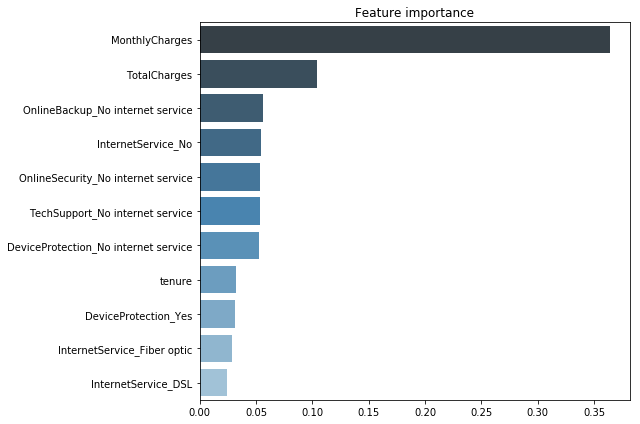

In [131]:
#因為totalcharge的data type沒有修改到, 所以會被進行one-hot-encoding
#未修改->將以上覺得沒有相關的col剔除

# Drop redundant columns (for features with two unique values)
drop = ['Streaming','StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'gender_Female', 'gender_Male',
        'Dependents_No', 'Dependents_Yes', 'Partner_No', 'Partner_Yes', 'SeniorCitizen', 'Churn_No', 'Churn_Yes']
x, y = df.drop(drop,axis=1), cs_b_2['Streaming']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
imp_five = imp.iloc[:11]
plt.figure(figsize=(9,6))
plt.title("Feature importance")
ax = sns.barplot(y=imp_five.index, x=imp_five.values, palette="Blues_d", orient='h')
#加了這行就可以讓所有的字顯示
plt.tight_layout()
plt.savefig('feature importance.png')
